### Ejercicio 4

<div>
<img src="img/diagrama.PNG" alt="Drawing" style="width: 600px;"/>
</div>

$$ f(n) = x(n).\left[1-c_1z^{-N}\right] $$

$$ g(n) = f(n)+g(n)a_0a_1z^{-1}+g(n)a_0a_2z^{-2} $$

$$ g(n) = \frac{f(n)}{1-a_0a_1z^{-1}-a_oa_2z^{-2}} $$

$$ h(n) = g(n)a_0 $$

$$ h(n) = \frac{a_0x(n).\left[1-c_1z^{-N}\right]}{1-a_0a_1z^{-1}-a_oa_2z^{-2}} $$

$$ y(n) = h(n)\left[b_0+z^{-1}b_1+z^{-2}b_2\right] $$

$$ y(n) = x(n)\frac{a_0.\left[1-c_1z^{-N}\right]\left[b_0+z^{-1}b_1+z^{-2}b_2\right]}{1-a_0a_1z^{-1}-a_oa_2z^{-2}} $$

$$ y(n) = x(n)\left[1-c_1z^{-N}\right]\frac{\left[b_0+z^{-1}b_1+z^{-2}b_2\right]}{\frac{1}{a_0}-a_1z^{-1}-a_2z^{-2}} $$

#### Filtro de media móvil

1. Es un filtro IIR potque no depende únicamente de la entrada, también tiene dependencia de las salidas anteriores.
2. Una gran ventaja del filtro es que puede ser implementado con un algoritmo que es muy rápido. Después de calcular la primer salida, todas las otras salidas se pueden calcular con sólo una sola suma y resta por punto. Esto se puede expresar en la ecuación:

$$ y[i]=y[i-1]+x[i+p]-x[i-p] $$

Siendo: $ p=\frac{M-1}{2} $ y $ q=p+1 $

3. No, porque esta estructura únicamente permite filtros de orden 2

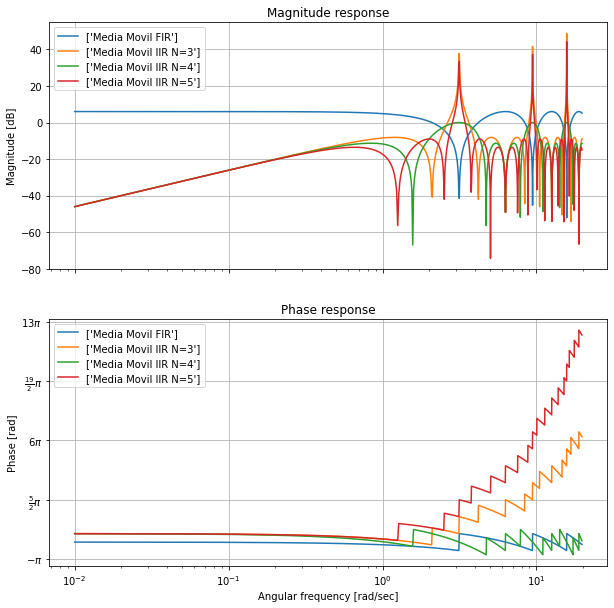

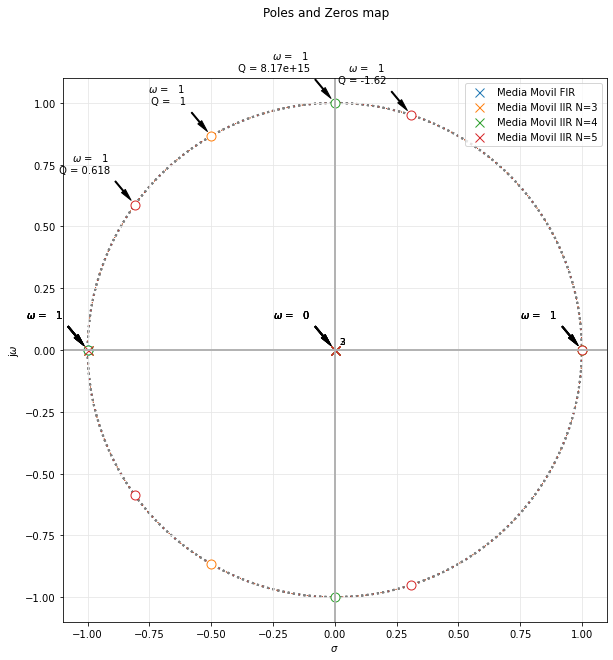

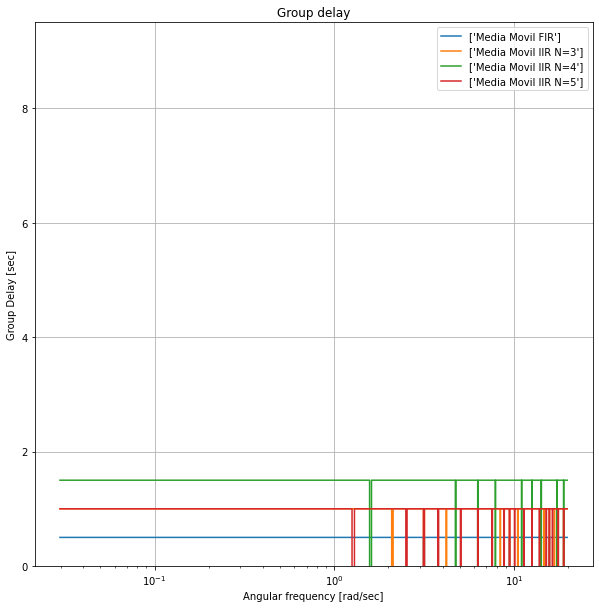

In [5]:
import scipy.signal as sig
import splane as s
import matplotlib as m
import matplotlib.pyplot as plt

m.rcParams['figure.figsize'] = (10,10)

fs=1

num_z = [1, 1]
den_z = [1, 0]

med_mov_fir = sig.TransferFunction(num_z, den_z, dt=1/fs)

num_z = [1/3, 0, 0, -1/3]
den_z = [1, 1, 0, 0]

med_mov_iir_3 = sig.TransferFunction(num_z, den_z, dt=1/fs)

num_z = [1/4, 0, 0, 0, -1/4]
den_z = [1, 1, 0, 0, 0]

med_mov_iir_4 = sig.TransferFunction(num_z, den_z, dt=1/fs)

num_z = [1/5, 0, 0, 0, 0, -1/5]
den_z = [1, 1, 0, 0, 0]

med_mov_iir_5 = sig.TransferFunction(num_z, den_z, dt=1/fs)

s.analyze_sys([med_mov_fir, med_mov_iir_3, med_mov_iir_4, med_mov_iir_5], 
              ["Media Movil FIR", "Media Movil IIR N=3", "Media Movil IIR N=4", "Media Movil IIR N=5"])

#### Filtro diferenciador

Para un diferenciador de primer orden, los coeficientes deberían tener los siguientes valores:

$$ h_1(k)=(1, −1) $$

Para un diferenciador de segundo orden, los coeficientes deberían tener los siguientes valores:

$$ h_2(k)=(1, 0, −1) $$

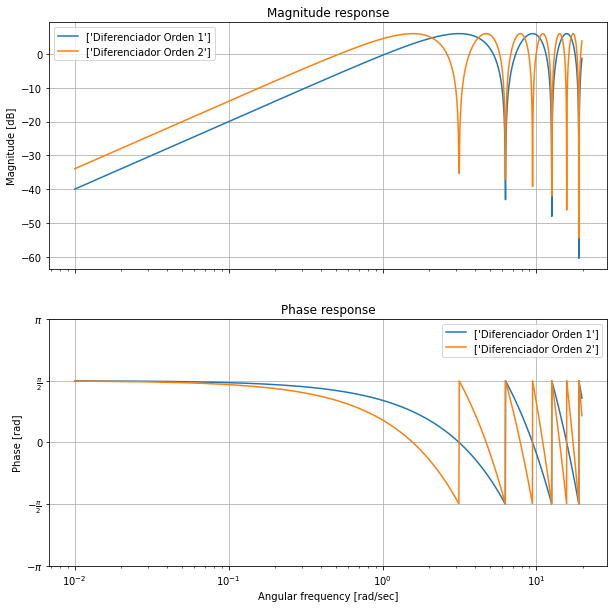

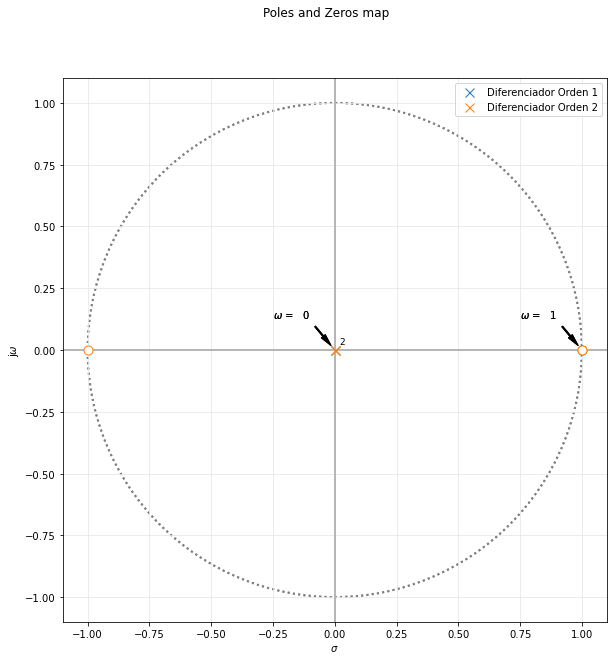

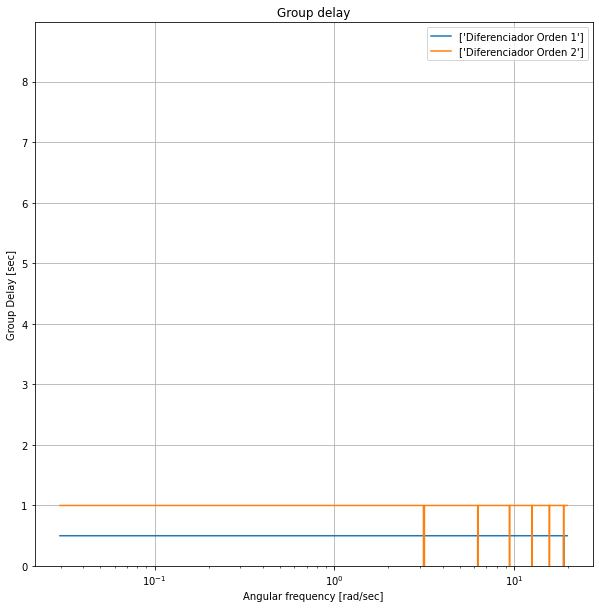

In [6]:
fs=1

num_z = [1, -1]
den_z = [1, 0]

dif_1 = sig.TransferFunction(num_z, den_z, dt=1/fs)

num_z = [1, 0, -1]
den_z = [1, 0, 0]

dif_2 = sig.TransferFunction(num_z, den_z, dt=1/fs)



s.analyze_sys([dif_1, dif_2], 
              ["Diferenciador Orden 1", "Diferenciador Orden 2"])

#### Integrador con pérdidas

$$ H(z)=\frac{1-z^{-1}}{1-(1-\alpha)z^{-1}} $$

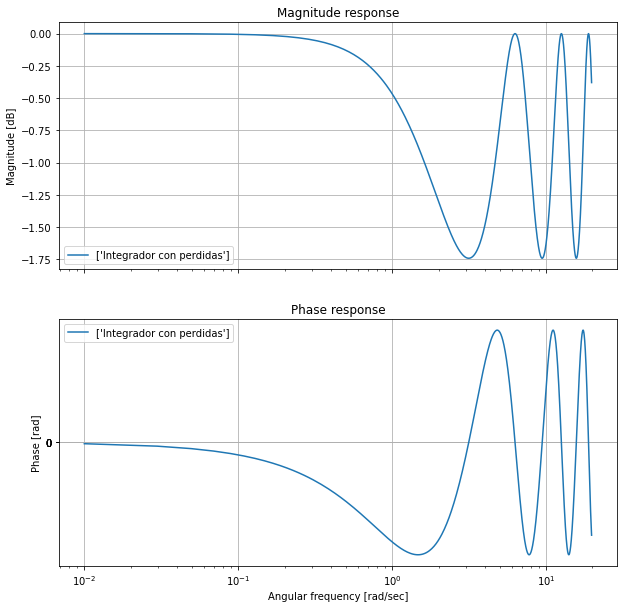

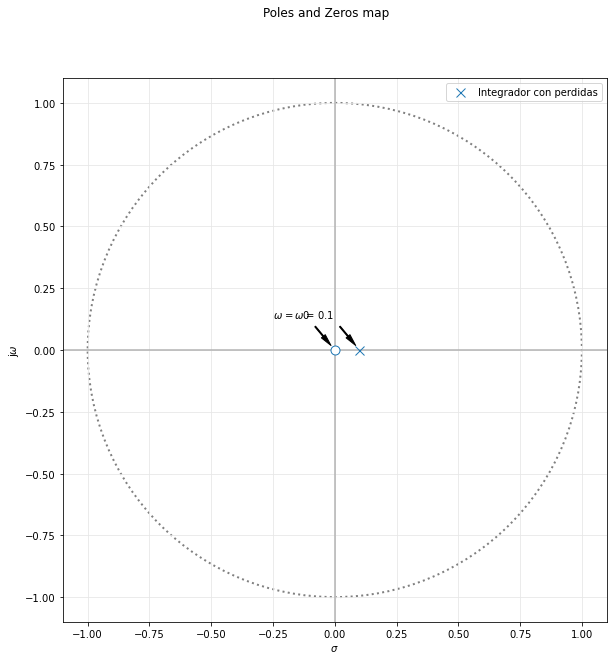

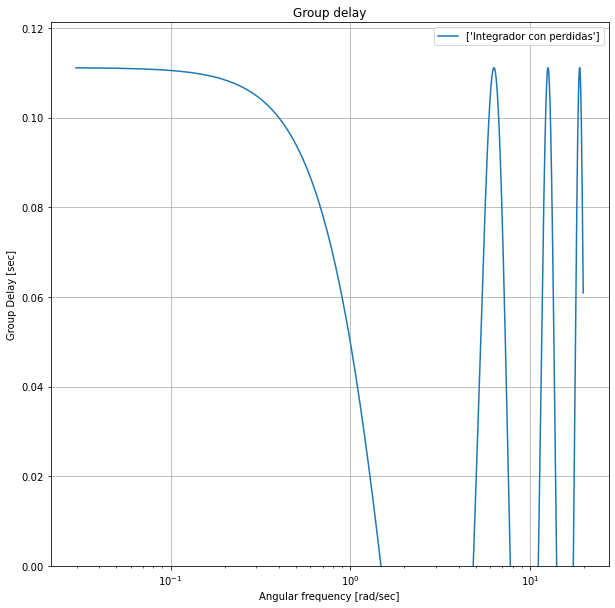

In [7]:
fs=1

num_z = [0.9, 0]
den_z = [1, -0.1]

integrador = sig.TransferFunction(num_z, den_z, dt=1/fs)


s.analyze_sys([integrador], 
              ["Integrador con perdidas"])

#### Filtro Elimina Continua

$$ H(z)=\frac{1-z^{-1}}{1-\alpha z^{-1}} $$

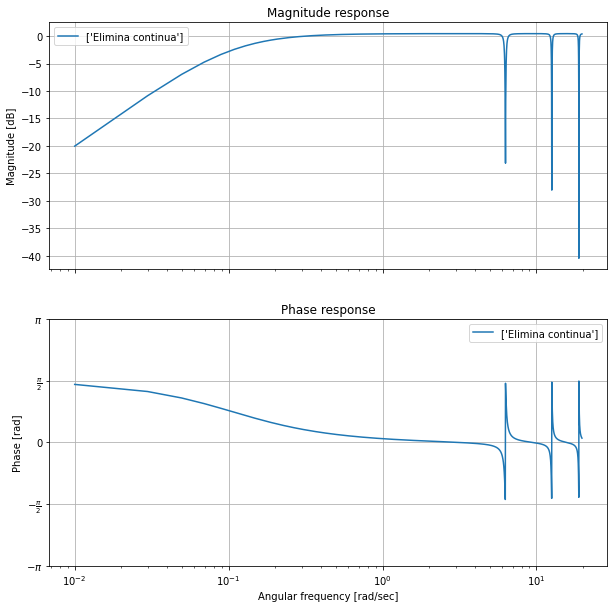

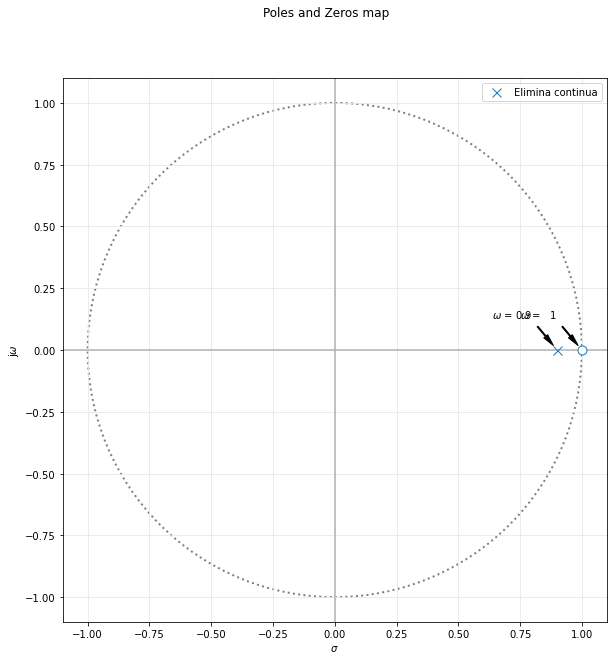

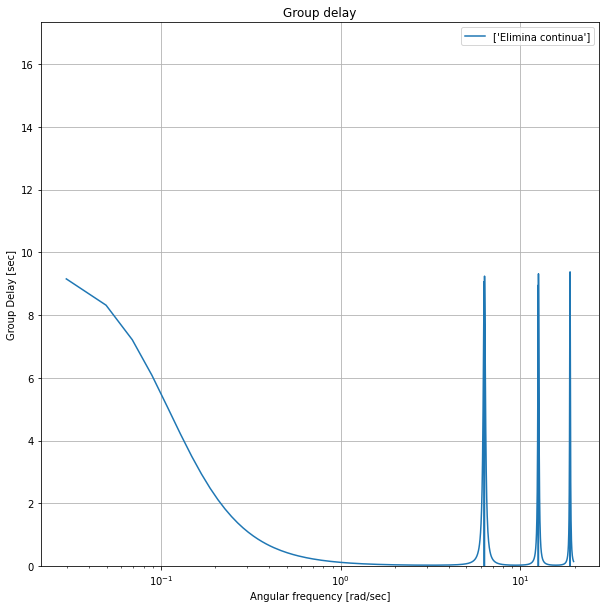

In [9]:
fs=1

num_z = [1, -1]
den_z = [1, -0.9]

dc_rm = sig.TransferFunction(num_z, den_z, dt=1/fs)


s.analyze_sys([dc_rm],
              ["Elimina continua"])

Determinar $\alpha$ para que la transferencia en $\Omega=\frac{\pi}{10}$· sea 3dB menor a la transferencia  en $\Omega=\pi$

$$ H(z)=\frac{1-z^{-1}}{1-\alpha z^{-1}} $$

$$ H(jw)=\frac{1-e^{-jw}}{1-\alpha e^{-jw}}=\frac{1-\left[cos(-w)+j sen(-w)\right]}{1-\alpha\left[cos(-w)+j sen(-w)\right]} $$

Aplicando módulo y reemplazando por los valores correspondientes se llega a:

$$ \frac{2}{1+\alpha}\frac{1}{\sqrt{2}}=\frac{0,313}{\sqrt{1-1,9\alpha+0,998\alpha^2}} $$

Despejando $\alpha$:

$$0,9491\alpha^2-1,9979\alpha+0,9511=0$$

Se obtienen 2 soluciones:
$$\alpha=0,727$$
$$\alpha=1,3776$$

Se usa $\alpha=0,727$. Simulando en el software pyfda se obtuvieron los siguientes resultados:

<div>
<img src="img/pyfda_1.PNG" alt="Drawing" style="width: 600px;"/>
</div>

<div>
<img src="img/pyfda_2.PNG" alt="Drawing" style="width: 600px;"/>
</div>

#### Filtro ecualizador de fase de 1º orden. 

$$ H(z)=\frac{1+Rz^{-1}}{1-\alpha z^{-1}} $$

Omega Limite = F_nyq * 0.11522893700185502 con D = -0.5
Sin Omega Limite con D = 0
Omega Limite = F_nyq * 0.09121911454327992 con D = 0.5


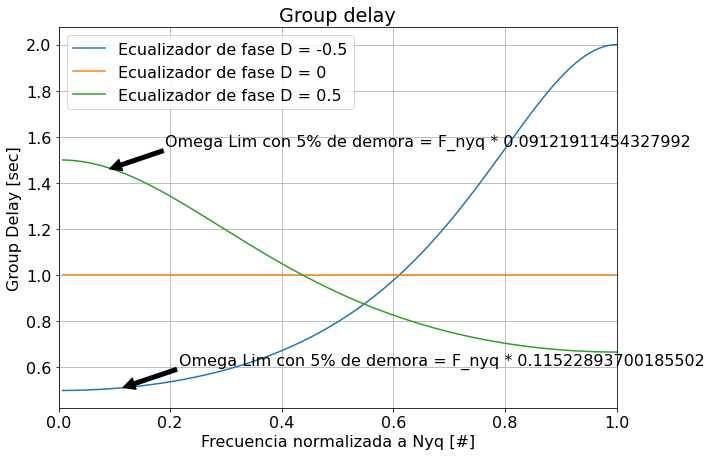

In [10]:
# Inicialización e importación de módulos
# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import scipy.signal as sig
import matplotlib as mpl
import matplotlib.pyplot as plt
from splane import GroupDelay

fig_sz_x = 10
fig_sz_y = 7
fig_dpi = 100 # dpi
fig_font_size = 16
mpl.rcParams['figure.figsize'] = (fig_sz_x,fig_sz_y)
plt.rcParams.update({'font.size':fig_font_size})

npoints = 500
offset = 0.1
fs = 2 
w_nyq = 2*np.pi*fs/2
d = [-0.5, 0, 0.5]

for current_d in d:

    r = (-current_d)/(current_d+2)
    #print(r) #Para usar en pyFDA
    num_z = [r, 1]
    den_z = [1, r] #En la TF es (-a1) por eso r 
    eq_ph = sig.TransferFunction(num_z, den_z, dt=1/fs)
    #GroupDelay(eq_ph,filter_description="Ecualizador de fase D = {0}".format(current_d), digital = True, fs = fs)
    
    w, _, phase = eq_ph.bode(np.linspace(10**-2, w_nyq, npoints))
    phaseRad = phase * np.pi / 180.0
    groupDelay = -np.diff(phaseRad.reshape((npoints, 1)), axis = 0)/np.diff(w).reshape((npoints-1,1))
    groupDelay_correction = groupDelay * 2
    aux_hdl = plt.plot(w[1:] / w_nyq , groupDelay_correction, label="Ecualizador de fase D = {0}".format(current_d))# Bode phase plo
    
    margin_sup = groupDelay_correction[0][0] + groupDelay_correction[0][0] * (2.5/100)
    margin_inf = groupDelay_correction[0][0] - groupDelay_correction[0][0] * (2.5/100)
    
    for gd in range(len(groupDelay_correction)):
        if groupDelay_correction[gd][0] > margin_sup or groupDelay_correction[gd][0] < margin_inf:
            #Paso el limite del 5%
            print('Omega Limite = F_nyq * {0} con D = {1}'.format(w[gd]/w_nyq,current_d))
            plt.annotate('Omega Lim con 5% de demora = F_nyq * {0}'.format(w[gd]/w_nyq), 
                         xy=(w[gd]/w_nyq,groupDelay_correction[gd][0]), 
                         xytext=((w[gd]/w_nyq) + offset, groupDelay_correction[gd][0] + offset), 
                         arrowprops=dict(facecolor='black'))
            break
        if gd == len(groupDelay_correction)-1:
            #Nunca rompi el limite del 5%
            print('Sin Omega Limite con D = {1}'.format(w[gd]/w_nyq, current_d))
            break
        
    
        
    
plt.grid(True)
plt.gca().set_xlim([0, 1])
plt.xlabel('Frecuencia normalizada a Nyq [#]')
plt.ylabel('Group Delay [sec]')
plt.title('Group delay')
plt.legend(loc='best')
axes_hdl = plt.gca()